In [65]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [66]:
filename = '/Users/cristianjimenez/Downloads/archive/multimodal_imdb.hdf5'

with h5py.File(filename, 'r') as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])

Keys: <KeysViewHDF5 ['features', 'genres', 'images', 'imdb_ids', 'sequences', 'three_grams', 'vgg_features', 'word_grams']>


In [67]:
with h5py.File(filename, 'r') as f:
    images = f['images']
    total_images = len(images)
    print('Total de imágenes:', total_images)

Total de imágenes: 25959


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..138].


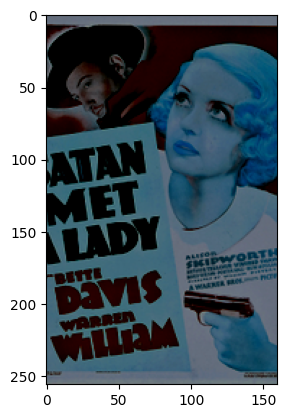

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


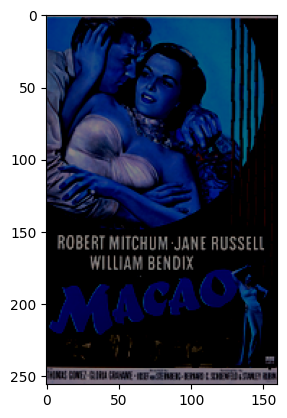

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..141].


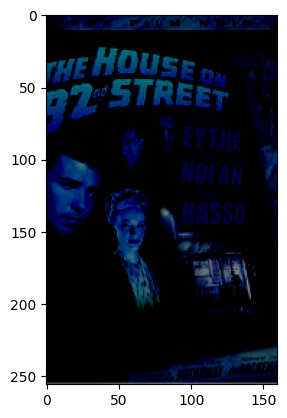

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


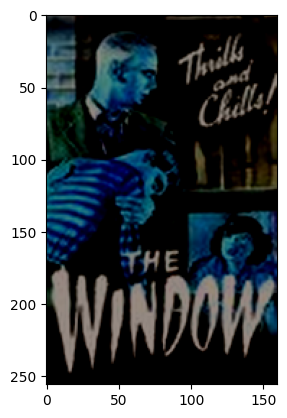

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


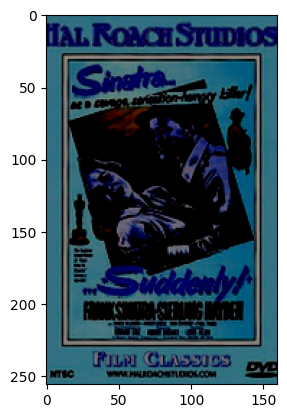

In [68]:
with h5py.File(filename, 'r') as f:
    # Get the images data
    images = f['images']

    # Loop over the images
    for i in range(len(images)):
        # Get the image
        image = images[i]

        # Transpose the image data to (height, width, channels)
        image = np.transpose(image, (1, 2, 0))

        # Display the image using matplotlib
        plt.imshow(image)
        plt.show()

        # Break after displaying the first 5 images
        if i == 4:
            break

In [69]:
genres_list = [
    'Drama',
    'Comedy',
    'Romance',
    'Thriller',
    'Crime',
    'Action',
    'Adventure',
    'Horror',
    'Documentary',
    'Mystery',
    'Sci-Fi',
    'Fantasy',
    'Family',
    'Biography',
    'War',
    'History',
    'Music',
    'Animation',
    'Musical',
    'Western',
    'Sport',
    'Short',
    'Film-Noir',
]

Géneros de la película: ['Drama', 'Thriller', 'Mystery', 'Film-Noir']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..138].


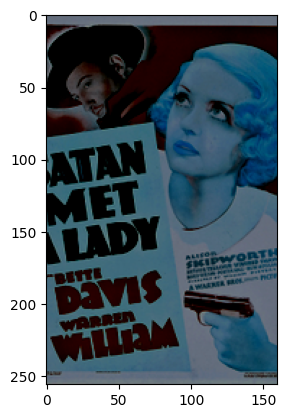

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Géneros de la película: ['Drama', 'Crime', 'Adventure', 'Film-Noir']


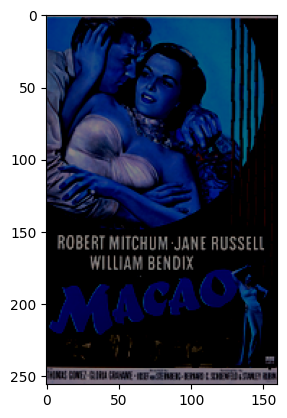

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..141].


Géneros de la película: ['Drama', 'Thriller', 'Crime', 'Mystery', 'Film-Noir']


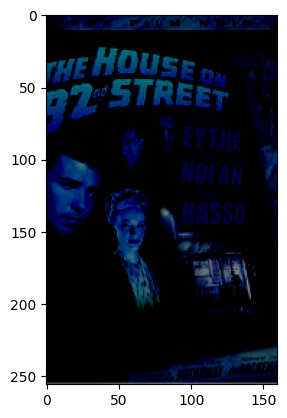

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Géneros de la película: ['Drama', 'Thriller', 'Film-Noir']


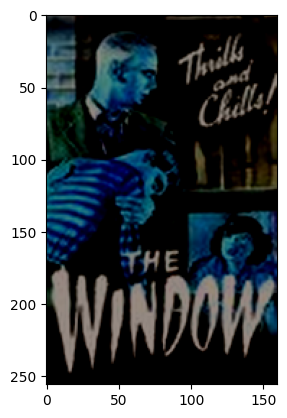

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Géneros de la película: ['Drama', 'Thriller', 'Crime', 'Film-Noir']


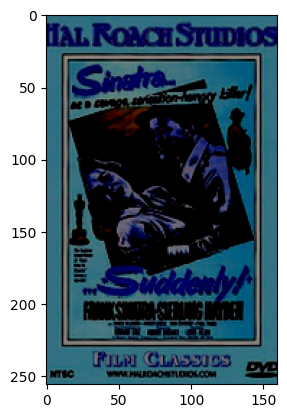

In [70]:
with h5py.File(filename, 'r') as f:
    # Obtiene los datos de las imágenes y los géneros
    images = f['images']
    genres = f['genres']

    # Recorre las primeras 5 imágenes y géneros
    for i in range(5):
        # Obtiene la imagen y el género
        image = images[i]
        genre = genres[i]

        # Transpone los datos de la imagen a (altura, ancho, canales)
        image = np.transpose(image, (1, 2, 0))

        # Convierte genre a una lista de booleanos
        genre_bool = [bool(g) for g in genre]

        # Usa la lista de booleanos para seleccionar los géneros correspondientes de genres_list
        movie_genres = [g for g, b in zip(genres_list, genre_bool) if b]

        # Imprime los géneros de la película
        print('Géneros de la película:', movie_genres)

        # Muestra la imagen usando matplotlib
        plt.imshow(image)
        plt.show()

In [73]:
from sklearn.model_selection import train_test_split

# Define el tamaño de los conjuntos de prueba y validación
test_size = 0.2
val_size = 0.25

# Carga las imágenes y los géneros
with h5py.File(filename, 'r') as f:
    images = f['images'][:5000]
    genres = f['genres'][:5000]

# Divide los datos en conjuntos de entrenamiento y prueba
train_images, test_images, train_genres, test_genres = train_test_split(images, genres, test_size=test_size, random_state=42)

# Divide los datos de entrenamiento en conjuntos de entrenamiento y validación
train_images, val_images, train_genres, val_genres = train_test_split(train_images, train_genres, test_size=val_size, random_state=42)

In [ ]:
print('Tamaño de los conjuntos de entrenamiento, validación y prueba:')
print(len(train_images), len(val_images), len(test_images))

In [ ]:
def display_image_and_genres(image, genre):
    # Transpone los datos de la imagen a (altura, ancho, canales)
    image = np.transpose(image, (1, 2, 0))

    # Imprime los géneros de la película
    print('Géneros de la película:', genre)

    # Muestra la imagen usando matplotlib
    plt.imshow(image)
    plt.show()

In [ ]:
display_image_and_genres(train_images[0], train_genres[0])

--------- separacio de ejercicos ------

In [ ]:
def generate_batch(images, genres, b):
    # Selecciona un lote de índices de imágenes al azar
    batch_indices = np.random.choice(len(images), size=b, replace=False)

    # Obtiene las imágenes y los géneros correspondientes a los índices seleccionados
    batch_images = images[batch_indices]
    batch_genres = genres[batch_indices]

    # Convierte los arrays de booleanos en listas de géneros
    batch_genres = [[g for g, b in zip(genres_list, genre_bool) if b] for genre_bool in batch_genres]

    return batch_images, batch_genres

In [ ]:
a = generate_batch(train_images, train_genres, 50)

In [ ]:
for i in range(5):
    display_image_and_genres(a[0][i], a[1][i])

In [ ]:
def jaccard_coefficient(genre_list1, genre_list2):
    # Convierte las listas de géneros en conjuntos
    genre_set1 = set(genre_list1)
    genre_set2 = set(genre_list2)

    # Calcula la intersección y la unión de los dos conjuntos de géneros
    intersection = genre_set1 & genre_set2
    union = genre_set1 | genre_set2
    
    coef = len(intersection) / len(union)
    
    print(f"Intersección: {intersection} - Unión: {union} - Coeficiente de Jaccard: {coef}")

    # Calcula y devuelve el coeficiente de Jaccard
    return coef

In [ ]:
batch_images, batch_genres = generate_batch(train_images, train_genres, 20)

In [ ]:
def compare_images(base_genre, image_list, genre_list):
    jaccard_scores = [jaccard_coefficient(base_genre, genre) for genre in genre_list]
    return image_list, genre_list, jaccard_scores

In [ ]:
base_genre = ['Drama']
image_list, genre_list, jaccard_scores = compare_images(base_genre, batch_images[:10], batch_genres[:10])

In [ ]:
def random_sample(image_list, genre_list):
    index = np.random.choice(len(image_list))
    return image_list[index], genre_list[index]

In [ ]:
image, genre = random_sample(image_list, genre_list)
display_image_and_genres(image, genre)